**Manipulação dos dados**

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('hepg2_raw_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25682 entries, 0 to 25681
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   action_type                0 non-null      float64
 1   activity_comment           587 non-null    object 
 2   activity_id                25682 non-null  int64  
 3   activity_properties        25682 non-null  object 
 4   assay_chembl_id            25682 non-null  object 
 5   assay_description          25682 non-null  object 
 6   assay_type                 25682 non-null  object 
 7   assay_variant_accession    0 non-null      float64
 8   assay_variant_mutation     0 non-null      float64
 9   bao_endpoint               25682 non-null  object 
 10  bao_format                 25682 non-null  object 
 11  bao_label                  25682 non-null  object 
 12  canonical_smiles           25679 non-null  object 
 13  data_validity_comment      1667 non-null   obj

In [6]:
df.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,38273,[],CHEMBL881719,The compound was tested for inhibition of chol...,F,NaN,NaN,BAO_0000190,...,Homo sapiens,HepG2,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.1
1,NaN,NaN,44218,[],CHEMBL881719,The compound was tested for inhibition of chol...,F,NaN,NaN,BAO_0000190,...,Homo sapiens,HepG2,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.1
2,NaN,NaN,47846,[],CHEMBL824182,The compound was tested for inhibition of chol...,F,NaN,NaN,BAO_0000190,...,Homo sapiens,HepG2,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,1.0
3,NaN,NaN,74264,[],CHEMBL695846,Compound was tested in vitro for growth inhibi...,F,NaN,NaN,BAO_0000190,...,Homo sapiens,HepG2,9606,NaN,NaN,IC50,ug ml-1,UO_0000274,NaN,10.0
4,NaN,NaN,78722,[],CHEMBL695847,Compound was tested in vitro for growth inhibi...,F,NaN,NaN,BAO_0000190,...,Homo sapiens,HepG2,9606,NaN,NaN,IC50,ug ml-1,UO_0000274,NaN,10.0


Removendo os dados sem y (coluna "value") e também sem unidades (coluna "units")

In [7]:
df_1 = df[(df['value'].notna()) & (df['units'].notna())]
df_1 = df_1.reset_index(drop=True)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24359 entries, 0 to 24358
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   action_type                0 non-null      float64
 1   activity_comment           0 non-null      object 
 2   activity_id                24359 non-null  int64  
 3   activity_properties        24359 non-null  object 
 4   assay_chembl_id            24359 non-null  object 
 5   assay_description          24359 non-null  object 
 6   assay_type                 24359 non-null  object 
 7   assay_variant_accession    0 non-null      float64
 8   assay_variant_mutation     0 non-null      float64
 9   bao_endpoint               24359 non-null  object 
 10  bao_format                 24359 non-null  object 
 11  bao_label                  24359 non-null  object 
 12  canonical_smiles           24356 non-null  object 
 13  data_validity_comment      1633 non-null   obj

In [8]:
df_1['units'].value_counts()

units
uM              20961
ug ml-1          1444
nM               1114
umol/L            422
mM                138
ng/ml              61
uM/ml              32
10'-6mg/ml         26
10'-4microM        18
mmol/L             17
microM             15
10'-1 ug/ml        15
g/L                14
mg/ml              12
ug/mL              10
mg/L                8
uM/L                8
10'-3microM         7
10'-2 ug/ml         6
10'-5 uM            5
umol                3
nmol/ml             3
10'3 uM             2
ug                  2
nM/ml               2
10'-4 ug/ml         2
10'-1microM         2
10'-2microM         2
10'4 uM             1
M mol/dm 3          1
ppm g dm**-3        1
10'-8mg/ml          1
10'-3 ug/ml         1
g/ml                1
µM                  1
nmol/L              1
Name: count, dtype: int64

O output acima ilustra vários tipos de unidades de medida para ic50, para que o dataset represente uma mesma unidade decidiu-se apenas manter os dados com unidade M (mol.L^-1). Posteriormente transformou-se toda a seleção em uM (10^-6 mol.L^-1).

In [9]:
valor_corrigido = []

for i,r in df_1.iterrows():
    if r['units'] == 'uM':
        valor_corrigido.append(r['value'])
    elif r['units'] == 'nM':
        r['value'] = r['value']*10**3
        valor_corrigido.append(r['value'])
    elif r['units'] == 'mM':
        r['value'] = r['value']*10**(-3)
        valor_corrigido.append(r['value'])
    else:
        r['value'] = np.nan
        valor_corrigido.append(r['value'])

valor_corrigido


[0.1,
 0.1,
 1.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 2.1,
 0.54,
 0.07,
 0.0028,
 nan,
 nan,
 1.2,
 0.06,
 100.0,
 1.1,
 0.1,
 15.0,
 8.4,
 10.0,
 10.0,
 3.5,
 0.088,
 5.59,
 0.078,
 0.05,
 0.33,
 10.0,
 0.33,
 0.5,
 0.4,
 1.7,
 0.079,
 100.0,
 100.0,
 3.6,
 0.079,
 100.0,
 0.46,
 0.8,
 0.23,
 100.0,
 1.2,
 1.0,
 50.0,
 9.53,
 0.17,
 8.1,
 0.87,
 12000.0,
 30.0,
 700.0,
 40000.0,
 100.0,
 59.3,
 100.0,
 37.1,
 2.5,
 118.0,
 100.0,
 37.9,
 452000.0,
 100.0,
 7000.0,
 100.0,
 900.0,
 2500.0,
 100.0,
 15800.0,
 35.4,
 100.0,
 5300.0,
 100.0,
 100.0,
 5.9,
 2.8,
 3.0,
 380.0,
 94.0,
 110.0,
 85.0,
 1.4,
 0.27,
 0.12,
 1245000.0,
 68.0,
 0.11,
 0.01,
 10.0,
 359000.0,
 380000.0,
 3446000.0,
 110.0,
 4088000.0,
 344000.0,
 0.05,
 10.0,
 10.0,
 415000.0,
 128.0,
 4352000.0,
 0.08,
 4204000.0,
 282000.0,
 0.46,
 0.63,
 1.4,
 1770.0,
 10.0,
 2.0,
 4.2,
 2830000.0,
 100.0,
 392000.0,
 53.0,
 7.0,
 0.08,
 100.0,
 10.0,
 2736000.0,
 4317000.0,
 44000.0,
 4001000.0,
 0.07,
 19.0,
 100.0,
 0

In [10]:
df_1['corrected value'] = valor_corrigido
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24359 entries, 0 to 24358
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   action_type                0 non-null      float64
 1   activity_comment           0 non-null      object 
 2   activity_id                24359 non-null  int64  
 3   activity_properties        24359 non-null  object 
 4   assay_chembl_id            24359 non-null  object 
 5   assay_description          24359 non-null  object 
 6   assay_type                 24359 non-null  object 
 7   assay_variant_accession    0 non-null      float64
 8   assay_variant_mutation     0 non-null      float64
 9   bao_endpoint               24359 non-null  object 
 10  bao_format                 24359 non-null  object 
 11  bao_label                  24359 non-null  object 
 12  canonical_smiles           24356 non-null  object 
 13  data_validity_comment      1633 non-null   obj

In [11]:
df_2 = df_1[np.logical_not(np.isnan(df_1['corrected value']))]
df_2 = df_2.reset_index(drop=True)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22213 entries, 0 to 22212
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   action_type                0 non-null      float64
 1   activity_comment           0 non-null      object 
 2   activity_id                22213 non-null  int64  
 3   activity_properties        22213 non-null  object 
 4   assay_chembl_id            22213 non-null  object 
 5   assay_description          22213 non-null  object 
 6   assay_type                 22213 non-null  object 
 7   assay_variant_accession    0 non-null      float64
 8   assay_variant_mutation     0 non-null      float64
 9   bao_endpoint               22213 non-null  object 
 10  bao_format                 22213 non-null  object 
 11  bao_label                  22213 non-null  object 
 12  canonical_smiles           22212 non-null  object 
 13  data_validity_comment      1252 non-null   obj

In [12]:
df_2['corrected value'].describe()

count    2.221300e+04
mean     5.800392e+05
std      7.328408e+06
min      8.000000e-06
25%      5.190000e+00
50%      1.600000e+01
75%      5.000000e+01
max      2.627270e+08
Name: corrected value, dtype: float64

In [13]:
selection = ['molecule_chembl_id','canonical_smiles', 'corrected value']

df_3 = df_2[selection]
df_3 = df_3.reset_index(drop=True)
df_3.head()

,molecule_chembl_id,canonical_smiles,corrected value
0,CHEMBL39380,COC(=O)CC(O)CP(=O)([O-])CCc1c(Cl)cc(Cl)cc1OCc1...,0.10
1,CHEMBL39003,CC(C)(C)C(=O)OCOC(=O)CC(O)CP(=O)(CCc1c(Cl)cc(C...,0.10
2,CHEMBL39102,O=C(O)C[C@H](O)CP(=O)(O)CCc1c(Cl)cc(Cl)cc1OCc1...,1.00
3,CHEMBL16120,CCN(CC#Cc1ccc(N=[N+]=[N-])cc1)Cc1cccc(OCc2cc(-...,2.10
4,CHEMBL267332,CCN(CC#Cc1cccc(N=[N+]=[N-])c1)Cc1cccc(OCc2cc(-...,0.54


Classificou-se os valores de ic50 (quanto menor é este valor, maior sua citotoxicidade). Valores menores do que 1 foram considerados ativos, entre 1 e 99, intermediários; maiores ou iguais a 100, inativos.

In [14]:
bioactivity = []

for i,r in df_3.iterrows():
    if r['corrected value'] >= 100.0:
        bioactivity.append('inactive')
    if r['corrected value'] < 1.0:
        bioactivity.append('active')
    if r['corrected value'] >= 1.0 and r['corrected value'] < 100.0:
        bioactivity.append('intermediate')

len(bioactivity)

22213

In [15]:
df_4 = pd.concat([df_3,pd.Series(bioactivity)], axis=1)
df_4.head(15)

,molecule_chembl_id,canonical_smiles,corrected value,0
0,CHEMBL39380,COC(=O)CC(O)CP(=O)([O-])CCc1c(Cl)cc(Cl)cc1OCc1...,0.1000,active
1,CHEMBL39003,CC(C)(C)C(=O)OCOC(=O)CC(O)CP(=O)(CCc1c(Cl)cc(C...,0.1000,active
2,CHEMBL39102,O=C(O)C[C@H](O)CP(=O)(O)CCc1c(Cl)cc(Cl)cc1OCc1...,1.0000,intermediate
3,CHEMBL16120,CCN(CC#Cc1ccc(N=[N+]=[N-])cc1)Cc1cccc(OCc2cc(-...,2.1000,intermediate
4,CHEMBL267332,CCN(CC#Cc1cccc(N=[N+]=[N-])c1)Cc1cccc(OCc2cc(-...,0.5400,active
5,CHEMBL16178,CCN(CC#Cc1ccccc1)Cc1cccc(OCc2cc(-c3ccsc3)cs2)c1,0.0700,active
6,CHEMBL54875,Nc1ccc(-c2cc(=O)c3c(N)c(F)cc(F)c3o2)cc1F,0.0028,active
7,CHEMBL16004,CCN(C/C=C/C#CC(C)(C)C)Cc1cccc(OC[Si](C)(C)c2cc...,1.2000,intermediate
8,CHEMBL15929,CCN(C/C=C/C#CC(C)(C)C)Cc1cccc(OC[Si](C)(C)c2cc...,0.0600,active
9,CHEMBL15811,CCN(CC#Cc1ccccc1N=[N+]=[N-])Cc1cccc(OCc2cc(-c3...,100.0000,inactive


In [16]:
df_4.rename(columns={'molecule_chembl_id':'molecule_id','canonical_smiles':'smiles','corrected value':'ic50',0:'bioactivity'}, inplace=True)
df_4 = df_4[['molecule_id','smiles','bioactivity','ic50']]
df_4.head(15)

,molecule_id,smiles,bioactivity,ic50
0,CHEMBL39380,COC(=O)CC(O)CP(=O)([O-])CCc1c(Cl)cc(Cl)cc1OCc1...,active,0.1000
1,CHEMBL39003,CC(C)(C)C(=O)OCOC(=O)CC(O)CP(=O)(CCc1c(Cl)cc(C...,active,0.1000
2,CHEMBL39102,O=C(O)C[C@H](O)CP(=O)(O)CCc1c(Cl)cc(Cl)cc1OCc1...,intermediate,1.0000
3,CHEMBL16120,CCN(CC#Cc1ccc(N=[N+]=[N-])cc1)Cc1cccc(OCc2cc(-...,intermediate,2.1000
4,CHEMBL267332,CCN(CC#Cc1cccc(N=[N+]=[N-])c1)Cc1cccc(OCc2cc(-...,active,0.5400
5,CHEMBL16178,CCN(CC#Cc1ccccc1)Cc1cccc(OCc2cc(-c3ccsc3)cs2)c1,active,0.0700
6,CHEMBL54875,Nc1ccc(-c2cc(=O)c3c(N)c(F)cc(F)c3o2)cc1F,active,0.0028
7,CHEMBL16004,CCN(C/C=C/C#CC(C)(C)C)Cc1cccc(OC[Si](C)(C)c2cc...,intermediate,1.2000
8,CHEMBL15929,CCN(C/C=C/C#CC(C)(C)C)Cc1cccc(OC[Si](C)(C)c2cc...,active,0.0600
9,CHEMBL15811,CCN(CC#Cc1ccccc1N=[N+]=[N-])Cc1cccc(OCc2cc(-c3...,inactive,100.0000


In [17]:
df_4['bioactivity'].value_counts()

bioactivity
intermediate    16199
inactive         3838
active           2176
Name: count, dtype: int64

In [18]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22213 entries, 0 to 22212
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   molecule_id  22213 non-null  object 
 1   smiles       22212 non-null  object 
 2   bioactivity  22213 non-null  object 
 3   ic50         22213 non-null  float64
dtypes: float64(1), object(3)
memory usage: 694.3+ KB


In [19]:
df_4 = df_4.dropna()
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22212 entries, 0 to 22212
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   molecule_id  22212 non-null  object 
 1   smiles       22212 non-null  object 
 2   bioactivity  22212 non-null  object 
 3   ic50         22212 non-null  float64
dtypes: float64(1), object(3)
memory usage: 867.7+ KB


In [20]:
df_4.head()

,molecule_id,smiles,bioactivity,ic50
0,CHEMBL39380,COC(=O)CC(O)CP(=O)([O-])CCc1c(Cl)cc(Cl)cc1OCc1...,active,0.10
1,CHEMBL39003,CC(C)(C)C(=O)OCOC(=O)CC(O)CP(=O)(CCc1c(Cl)cc(C...,active,0.10
2,CHEMBL39102,O=C(O)C[C@H](O)CP(=O)(O)CCc1c(Cl)cc(Cl)cc1OCc1...,intermediate,1.00
3,CHEMBL16120,CCN(CC#Cc1ccc(N=[N+]=[N-])cc1)Cc1cccc(OCc2cc(-...,intermediate,2.10
4,CHEMBL267332,CCN(CC#Cc1cccc(N=[N+]=[N-])c1)Cc1cccc(OCc2cc(-...,active,0.54


<Axes: ylabel='ic50'>

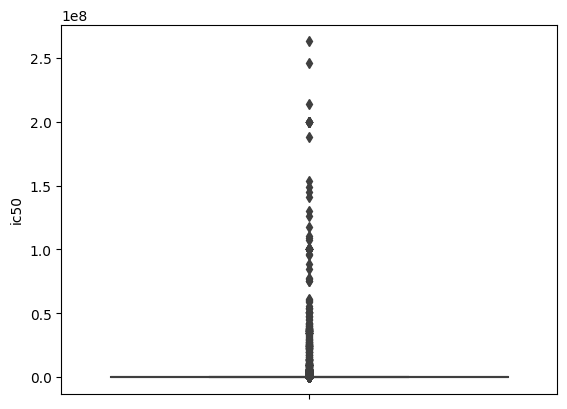

In [21]:
import seaborn as sns

sns.boxplot(y='ic50', data=df_4)

Encontrou-se vários outliers nos valores de ic50, desta forma o código a partir desta linha tenta remove-los

In [22]:
import numpy as np

In [23]:
from scipy import stats

def remove_outliers_zscore(df, column_name, z_threshold=3):
    df_no_outliers = df.copy()

    z_scores = stats.zscore(df_no_outliers[column_name])
    
    outliers_mask = (abs(z_scores) > z_threshold)

    df_no_outliers = df_no_outliers[~outliers_mask]

    return df_no_outliers.reset_index()

In [24]:
df_4 = remove_outliers_zscore(df_4,'ic50',3)
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22052 entries, 0 to 22051
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        22052 non-null  int64  
 1   molecule_id  22052 non-null  object 
 2   smiles       22052 non-null  object 
 3   bioactivity  22052 non-null  object 
 4   ic50         22052 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 861.5+ KB


In [25]:
df_4.to_csv('hepg2_3class_ic50.csv', index=False)

Com a finalidade de facilitar a visualização dos dados e manter um dataset com uma variação menor da coluna dependente (melhorar a performance dos algorítmos de ML) decidiu-se manipular os valores de ic50 para pic50 (-log(ic50)). 

In [26]:
pic50 = []

for x in df_4.index:
    pic50.append(-np.log10(df_4.loc[x,'ic50']))

pic50 = pd.Series(pic50)
sum(pic50.isna()),pic50.describe()

(0,
 count    22052.000000
 mean        -1.244347
 std          1.245486
 min         -7.351448
 25%         -1.698970
 50%         -1.195900
 75%         -0.707570
 max          5.096910
 dtype: float64)

In [27]:
selection = ['molecule_id','smiles', 'bioactivity']
df_5 = pd.concat([df_4[selection],pic50], axis=1)
df_5.columns = ['molecule_id','smiles', 'bioactivity','pic50']

In [28]:
df_5.head()

,molecule_id,smiles,bioactivity,pic50
0,CHEMBL39380,COC(=O)CC(O)CP(=O)([O-])CCc1c(Cl)cc(Cl)cc1OCc1...,active,1.000000
1,CHEMBL39003,CC(C)(C)C(=O)OCOC(=O)CC(O)CP(=O)(CCc1c(Cl)cc(C...,active,1.000000
2,CHEMBL39102,O=C(O)C[C@H](O)CP(=O)(O)CCc1c(Cl)cc(Cl)cc1OCc1...,intermediate,-0.000000
3,CHEMBL16120,CCN(CC#Cc1ccc(N=[N+]=[N-])cc1)Cc1cccc(OCc2cc(-...,intermediate,-0.322219
4,CHEMBL267332,CCN(CC#Cc1cccc(N=[N+]=[N-])c1)Cc1cccc(OCc2cc(-...,active,0.267606


In [29]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22052 entries, 0 to 22051
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   molecule_id  22052 non-null  object 
 1   smiles       22052 non-null  object 
 2   bioactivity  22052 non-null  object 
 3   pic50        22052 non-null  float64
dtypes: float64(1), object(3)
memory usage: 689.3+ KB


In [31]:
df_5 = df_5.dropna()

In [30]:
df_5.to_csv('bioactivity_hepg2_data', index=False)